In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def ConjugateGradientLinearSystemEquations(matrix, vector, tolerance, max_iterations):
    """
    Solve a linear system of equations using the Conjugate Gradient method.

    Parameters
    ----------
    matrix : numpy.ndarray
        A square matrix of size n x n.
    vector : numpy.ndarray
        A vector of size n.
    tolerance : float
        The tolerance for the stopping criterion.
    max_iterations : int
        The maximum number of iterations to perform if the stopping criterion is not met.

    Returns
    -------
    optima : numpy.ndarray
        The solution of the linear system of equations.
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting or debugging.
    """
    n = vector.shape[0]
    x0 = np.zeros((n,))

    x_values = []
    gradients = []
    gradient_norms = []
    Q_conjugate_vectors = []
    alpha_values = []

    x_values.append(x0)
    x = np.reshape(x_values[-1], (n, 1))
    vector = np.reshape(vector, (n, 1))
    gradients.append(np.dot(matrix, x) - vector)
    gradient_norms.append(np.linalg.norm(gradients[-1]))
    Q_conjugate_vectors.append(-1*gradients[-1])
    grad = np.reshape(gradients[-1], (n, 1))
    b_k = np.reshape(Q_conjugate_vectors[-1], (n, 1))
    alpha_values.append(-1 * np.dot(b_k.T, grad) / np.dot(b_k.T, np.dot(matrix, b_k)))

    k=0
    while gradient_norms[-1] > tolerance and len(Q_conjugate_vectors) <= n:
        x_values.append(x_values[-1] + alpha_values[-1][0, 0] * np.reshape(Q_conjugate_vectors[-1], (n,)))
        x = np.reshape(x_values[-1], (n, 1))
        vector = np.reshape(vector, (n, 1))
        gradients.append(np.dot(matrix, x) - vector)
        gradient_norms.append(np.linalg.norm(gradients[-1]))

        next_conj = np.copy(gradients[-1])
        grad = np.reshape(gradients[-1], (n, 1))
        for i in range(len(Q_conjugate_vectors)):
            b_i = np.reshape(Q_conjugate_vectors[i], (n, 1))
            beta_i = -1 * np.dot(b_i.T, np.dot(matrix, grad)) / np.dot(b_i.T, np.dot(matrix, b_i))
            next_conj += (beta_i * b_i)

        Q_conjugate_vectors.append(next_conj)
        grad = np.reshape(gradients[-1], (n, 1))
        b_k = np.reshape(Q_conjugate_vectors[-1], (n, 1))
        alpha_values.append(-1 * np.dot(b_k.T, grad) / np.dot(b_k.T, np.dot(matrix, b_k)))

        k+=1

    plt.plot(range(k+1), gradient_norms)
    plt.grid()
    plt.xlabel("Iteration")
    plt.ylabel("Norm of Gradient")
    plt.legend(["Norm of Gradient"])
    plt.title("Norm of Gradient vs Iteration")
    plt.show()

    cache = [x_values, k]
    return x_values[-1], cache


In [ ]:
def generateRandomSparseSymmetricMatrix(size, density):
    """
    Generate a random sparse symmetric matrix.

    Parameters
    ----------
    size : int
        The size of the matrix.

    density : float
        The density of the generated matrix, density equal to one means a
        full matrix, density of 0 means a matrix with no non-zero items.

    Returns
    -------
    sparse_symmetric_matrix : numpy.ndarray
        Symmetric n x n matrix with random values.
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting or debugging.
    """
    m = np.random.binomial(1, density, (size, size))
    sparse_symmetric_matrix = np.random.random((size, size))
    sparse_symmetric_matrix = np.multiply(sparse_symmetric_matrix, m)
    sparse_symmetric_matrix = (sparse_symmetric_matrix + sparse_symmetric_matrix.T)/2

    return sparse_symmetric_matrix

In [ ]:
def generateRandomSparseVector(size, density):
    """
    Generate a random sparse vector.

    Parameters
    ----------
    size : int
        The size of the vector.

    density : float
        The density of the generated vector, density equal to one means a
        full vector, density of 0 means a vector with no non-zero items.

    Returns
    -------
    sparse_vector numpy.ndarray
        Vector of size n with random values.
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting or debugging.
    """

    m = np.random.binomial(1, density, (size,))
    sparse_vector = np.random.randint(100, size = (size,))
    sparse_vector = np.multiply(sparse_vector, m)

    return sparse_vector

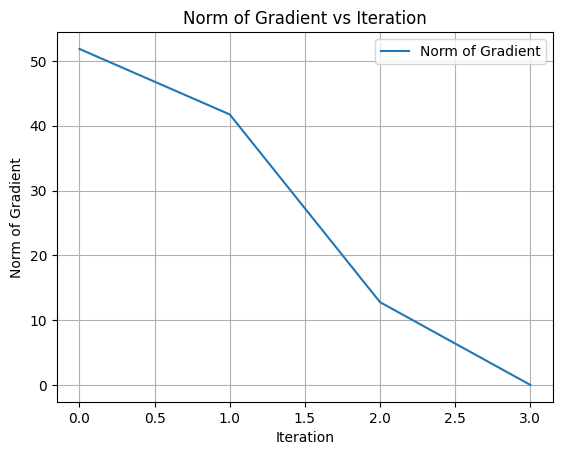

Obtained Solution:
[5.74401909e+01 1.06581410e-14 4.88073733e+01]
Built-in Solution:
[57.4401909   0.         48.80737327]


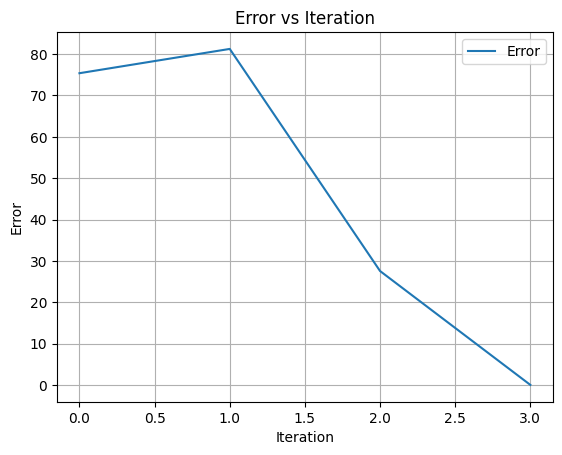

In [ ]:
# Small errors with the actual solution is due to division round off errors
# Larger errors are due to algorithm not working for the given inputs. (Matrix is not PD)

density1 = 0.6
density2 = 0.8
tolerance = 0.01
max_iterations = 1000
size = 3

matrix = generateRandomSparseSymmetricMatrix(size, density1)
vector = generateRandomSparseVector(size, density2)

solution, cache = ConjugateGradientLinearSystemEquations(matrix, vector, tolerance, max_iterations)

trial_points = cache[0]
k = cache[1]

built_in_solution = np.linalg.solve(matrix, vector)

print("Obtained Solution:")
print(solution)

print("Built-in Solution:")
print(built_in_solution)

errors = []
for i in range(k+1):
    errors.append(np.linalg.norm(trial_points[i] - built_in_solution))

plt.plot(range(k+1), errors)
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend(["Error"])
plt.title("Error vs Iteration")
plt.show()